In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# api
!kaggle competitions download -c dogs-vs-cats

 97% 786M/812M [00:06<00:00, 207MB/s]
100% 812M/812M [00:06<00:00, 127MB/s]


In [ ]:
# Extracting the compresed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Data set is extracted")

The Data set is extracted


In [ ]:
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Data set is extracted")

The Data set is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


In [ ]:
names = os.listdir('/content/train')
print(names)

['dog.3955.jpg', 'cat.981.jpg', 'cat.10808.jpg', 'dog.10797.jpg', 'dog.5118.jpg', 'dog.9569.jpg', 'cat.4316.jpg', 'cat.9139.jpg', 'cat.8711.jpg', 'dog.5438.jpg', 'dog.4642.jpg', 'dog.8037.jpg', 'cat.2615.jpg', 'dog.645.jpg', 'dog.9627.jpg', 'dog.8291.jpg', 'dog.12287.jpg', 'dog.11600.jpg', 'dog.3088.jpg', 'cat.189.jpg', 'cat.2219.jpg', 'cat.1597.jpg', 'dog.12072.jpg', 'cat.8702.jpg', 'cat.9161.jpg', 'cat.10530.jpg', 'cat.2993.jpg', 'dog.75.jpg', 'dog.5811.jpg', 'dog.2873.jpg', 'cat.10482.jpg', 'cat.1246.jpg', 'cat.8507.jpg', 'cat.10480.jpg', 'dog.5546.jpg', 'dog.11392.jpg', 'dog.8471.jpg', 'cat.322.jpg', 'cat.11593.jpg', 'dog.12231.jpg', 'cat.10021.jpg', 'cat.10623.jpg', 'dog.12498.jpg', 'dog.7283.jpg', 'dog.10634.jpg', 'cat.7048.jpg', 'dog.8827.jpg', 'cat.8171.jpg', 'dog.865.jpg', 'cat.7742.jpg', 'cat.7162.jpg', 'dog.1148.jpg', 'cat.2347.jpg', 'cat.12052.jpg', 'dog.7310.jpg', 'cat.12297.jpg', 'cat.4302.jpg', 'cat.9636.jpg', 'dog.6717.jpg', 'cat.1270.jpg', 'dog.2955.jpg', 'cat.8909.jpg

In [ ]:
dog_count = 0
cat_count = 0
for i in names:
  name = i[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Dog Images: ", dog_count)
print("Cat Images: ", cat_count)

Dog Images:  12500
Cat Images:  12500


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

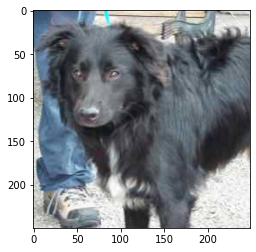

In [ ]:
#Displaying the image of dog
img = mpimg.imread('/content/train/dog.10084.jpg')
plt.imshow(img)

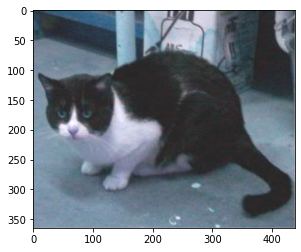

In [ ]:
#Displaying the image of cat
import cv2
img = cv2.imread('/content/train/cat.2048.jpg')
plt.imshow(img)

In [ ]:
 # Creating a new directory for resized images

os.mkdir('/content/resized_image')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/resized_image/'

for i in range(7000):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

In [ ]:
#Displaying the Resized image of dog
img = mpimg.imread('/content/resized_image/dog.11005.jpg')
plt.imshow(img)

In [ ]:
#Displaying the image of cat
import cv2
img = cv2.imread('/content/resized_image/cat.10133.jpg')
plt.imshow(img)

DOG --> 1

CAT --> 0

In [ ]:
# Creating lables for the Cats and Dogs
#Creating for loop to assign lables

file_names = os.listdir('/content/resized_image/')

labels = []

for i in range(7000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(file_names[0:10])
print(len(file_names))

['dog.3955.jpg', 'cat.981.jpg', 'cat.10808.jpg', 'dog.10797.jpg', 'dog.5118.jpg', 'dog.9569.jpg', 'cat.4316.jpg', 'cat.9139.jpg', 'cat.8711.jpg', 'dog.5438.jpg']
7000


In [ ]:
print(labels[0:10])
print(len(labels))

[1, 0, 0, 1, 1, 1, 0, 0, 0, 1]
7000


In [ ]:
# Now we will count how many dog images and Cat images

values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[3481 3519]


**Converting the resized images to numpy**

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/resized_image/'
image_extension = ['jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(array_images)

[[[[181 190 194]
   [181 190 194]
   [181 190 194]
   ...
   [ 80 104 132]
   [ 81 105 133]
   [ 81 105 133]]

  [[179 188 192]
   [179 188 192]
   [179 188 192]
   ...
   [ 80 104 132]
   [ 81 105 133]
   [ 81 105 133]]

  [[178 187 191]
   [178 187 191]
   [177 186 190]
   ...
   [ 81 105 133]
   [ 81 105 133]
   [ 81 105 133]]

  ...

  [[ 20  13  50]
   [ 20  13  50]
   [ 21  12  52]
   ...
   [ 24  24   6]
   [ 24  24   8]
   [ 24  24   8]]

  [[ 18  11  48]
   [ 18  11  48]
   [ 19  10  50]
   ...
   [ 24  25   5]
   [ 24  24   6]
   [ 24  24   6]]

  [[ 16   9  46]
   [ 16   9  46]
   [ 18   9  49]
   ...
   [ 24  25   5]
   [ 24  24   6]
   [ 24  24   6]]]


 [[[156 167 171]
   [156 167 171]
   [157 168 172]
   ...
   [163 164 168]
   [161 160 169]
   [160 159 168]]

  [[156 167 171]
   [156 167 171]
   [156 167 171]
   ...
   [163 164 168]
   [162 162 168]
   [161 160 169]]

  [[156 167 171]
   [155 166 170]
   [154 165 169]
   ...
   [164 165 169]
   [163 163 169]
   [163 163

In [ ]:
type(array_images)

numpy.ndarray

In [ ]:
print(array_images.shape)

(7000, 224, 224, 3)


In [ ]:
X = array_images
Y = np.array(labels)

**Train and Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Scalling

X_train_scale = X_train/255

X_test_scale = X_test/255

**Neural Network (Mobile Net)**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'RMSprop',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scale, Y_train, epochs=15)

In [ ]:
score, acc = model.evaluate(X_test_scale, Y_test)
print("Test Loss = ", score)
print("Test Accuracy = ", acc)

10/10 [==============================] - 1s 77ms/step - loss: 0.0648 - acc: 0.9767
Test Loss =  0.06483500450849533
Test Accuracy =  0.9766666889190674


**Predictive System**

path of the image to be predicted: /content/download_dog.jpeg


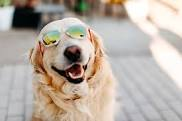

1/1 [==============================] - 0s 23ms/step
[[-5.511277  5.474836]]
The Image Represents Dog


In [ ]:
# MOBILENET
input_image_path = input("path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_predict_label = np.argmax(input_prediction)
# print(input_predict_label)

if input_predict_label == 0:
  print("The Image Represents Cat")
else:
  print("The Image Represents Dog")